## Import Libraries 

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data 

In [308]:
df=pd.read_csv("../Data/loan.csv")

In [309]:
df.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


## Exploratory Data Analysis

### Data Preview 

In [310]:
# check dataset size
df.shape

(148670, 20)

In [311]:
df.drop_duplicates(keep='first',inplace=True)

In [312]:
df.shape

(148670, 20)

#### -> There are 148670 rows and 20 columns/features in the dataset. 

In [313]:
# dataset column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

### Observations

#### -> There are missing values present in dataset.
#### -> Dataset has both numerical and string values.
#### -> Datatypes are correctly assigned.

In [314]:
# check percentage of null values in each column
df.isna().sum()/len(df)*100

ID                           0.000000
year                         0.000000
loan_limit                   2.249277
Gender                       0.000000
loan_type                    0.000000
loan_purpose                 0.090133
business_or_commercial       0.000000
loan_amount                  0.000000
rate_of_interest            24.509989
Upfront_charges             26.664425
property_value              10.155378
occupancy_type               0.000000
income                       6.154571
credit_type                  0.000000
Credit_Score                 0.000000
co-applicant_credit_type     0.000000
age                          0.134526
LTV                         10.155378
Region                       0.000000
Status                       0.000000
dtype: float64

#### -> columns with null values : Upfront_charges , property_value , rate_of_interest , age , LTV , loan_purpose , loan_limit , income
#### -> columns Upfront_charges and rate_of_interest have higher null values percentage. 


In [315]:
# check statistical values for fields with numerical values

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,173559.00
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2019.00
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,60000.00
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00
LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25
Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00


In [316]:
# check statistical values for fields other than numerical values

df.describe(exclude=np.number).T

,count,unique,top,freq
loan_limit,145326,2,cf,135348
Gender,148670,4,Male,42346
loan_type,148670,3,type1,113173
loan_purpose,148536,4,p3,55934
business_or_commercial,148670,2,nob/c,127908
occupancy_type,148670,3,pr,138201
credit_type,148670,4,CIB,48152
co-applicant_credit_type,148670,2,CIB,74392
age,148470,7,45-54,34720
Region,148670,4,North,74722


### Observations

#### -> There are 148670 unique entries in the dataset.
#### -> There may be outliers present in few numerical columns which has to be treated.


## Helper Functions 

### Basic Details of Column

In [317]:
def get_column_details(df,column):
    print("\n*****************************************")
    print(f"Details of {column} column")
    
    print("*****************************************")
    
    #Datatype of Column
    print(f"\nDatatype : {df[column].dtype} \n")
    
    #Check for null values
    
    null_count=df[column].isna().sum()
    
    if null_count > 0:
        
        print(f"\nThere are {null_count} null values present.")
        
    else:
        
        print(f"There are no null values present.")
        
    
        
    #Number of Unique values
    
    print(f"\nNumber of Unique Values : {df[column].nunique()}")
    
    
    #Distribution of Unique values
    
    print(f"\nDistribution of Unique Values :")
    print(df[column].value_counts())
    
    #Max and Min Value if Numeric
    
    if df[column].dtype=='int64' or df[column].dtype=='float64':
        print(f"\nMaximum Value : {np.max(df[column])}")
        print(f"\nMinimum Value : {np.min(df[column])}")
        

### Displot

In [318]:
def plot_displot(df,column,title,rotation=0,bins=20):
    
    
    print("\n-------------------------------------------")
    print(f"\n{title} Distribution Plot")
    
    
    palette="deep"
    sns.set_palette(palette)
    
    sns.displot(data=df, x=column, kde=True, bins=bins)
    
    plt.xlabel(f"{title}")
    plt.ylabel("Number of Records")
    plt.title(f"{title} Distribution")
    plt.xticks(rotation=rotation)
    
    plt.show()

### Count Plot 

In [319]:
def plot_countplot(df,column,title,rotation=0):

    palette="deep"
    sns.set_palette(palette)
    
    sns.countplot(data=df, x=column)
    
    plt.xlabel(f"{title}")
    plt.ylabel("Number of Records")
    plt.title(f"{title} Distribution")
    plt.xticks(rotation=rotation)
    
    plt.show()

### Fill Null Values with Column Mode

In [320]:
def fill_na_with_mode(df,column):
    
    

        print(f"\nThere are {df[column].isnull().sum()} null values present.")
        
        print(df[column].value_counts())
    
        if df[column].isin([None]).sum():
  
            
            df.loc[df[column].isin([None])]=np.NaN
        
        
        df[column] = df[column].fillna(df[column].mode(dropna=True).iat[0])
    
        print(f"\nThere are {df[column].isnull().sum()} null values present.")
        
        print(df[column].value_counts())
        

## ID 

In [321]:
get_column_details(df,'ID')


*****************************************
Details of ID column
*****************************************

Datatype : int64 

There are no null values present.

Number of Unique Values : 148670

Distribution of Unique Values :
ID
24890     1
123979    1
123999    1
124000    1
124001    1
         ..
74447     1
74448     1
74449     1
74450     1
173559    1
Name: count, Length: 148670, dtype: int64

Maximum Value : 173559

Minimum Value : 24890


## Year 

In [322]:
get_column_details(df,'year')


*****************************************
Details of year column
*****************************************

Datatype : int64 

There are no null values present.

Number of Unique Values : 1

Distribution of Unique Values :
year
2019    148670
Name: count, dtype: int64

Maximum Value : 2019

Minimum Value : 2019


## Loan Limit 

In [323]:
get_column_details(df,'loan_limit')


*****************************************
Details of loan_limit column
*****************************************

Datatype : object 


There are 3344 null values present.

Number of Unique Values : 2

Distribution of Unique Values :
loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64


In [324]:
fill_na_with_mode(df,'loan_limit')


There are 3344 null values present.
loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64

There are 0 null values present.
loan_limit
cf     138692
ncf      9978
Name: count, dtype: int64


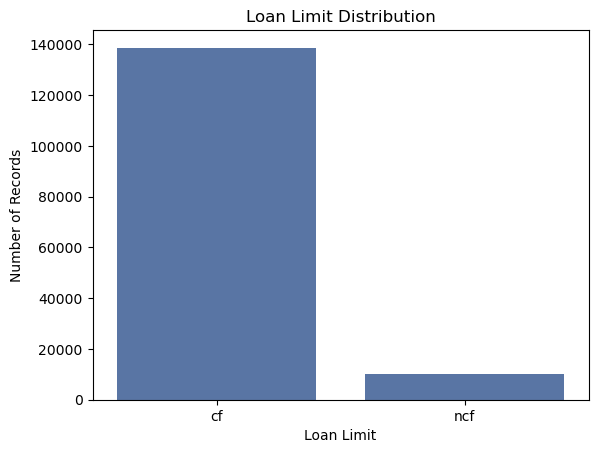

In [325]:
plot_countplot(df,'loan_limit','Loan Limit')

## Gender 

In [326]:
get_column_details(df,'Gender')


*****************************************
Details of Gender column
*****************************************

Datatype : object 

There are no null values present.

Number of Unique Values : 4

Distribution of Unique Values :
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64


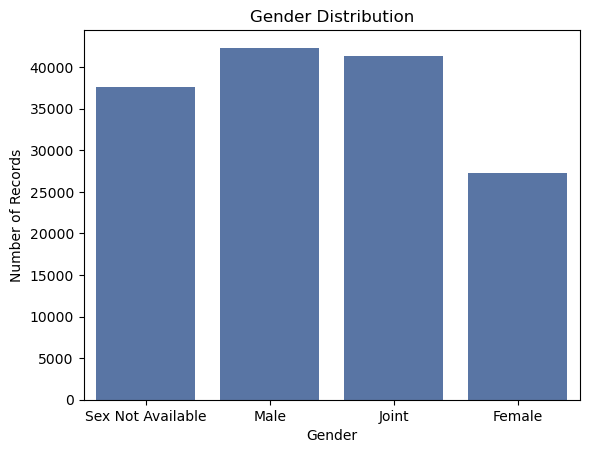

In [327]:
plot_countplot(df,'Gender','Gender')

## Loan Type 

In [328]:
get_column_details(df,'loan_type')


*****************************************
Details of loan_type column
*****************************************

Datatype : object 

There are no null values present.

Number of Unique Values : 3

Distribution of Unique Values :
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64


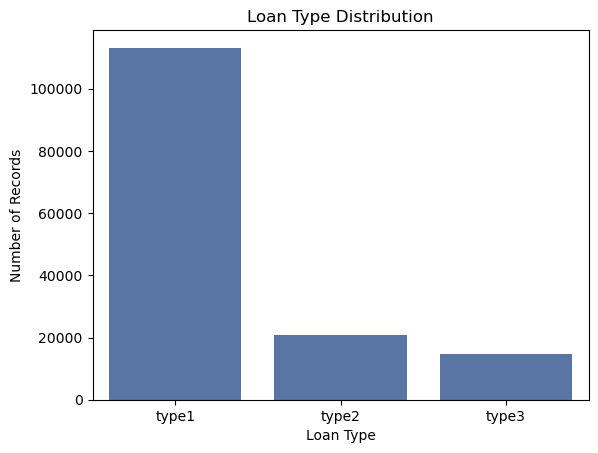

In [329]:
plot_countplot(df,'loan_type','Loan Type')

## Loan Purpose 

In [330]:
get_column_details(df,'loan_purpose')


*****************************************
Details of loan_purpose column
*****************************************

Datatype : object 


There are 134 null values present.

Number of Unique Values : 4

Distribution of Unique Values :
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64


In [331]:
fill_na_with_mode(df,'loan_purpose')


There are 134 null values present.
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64

There are 0 null values present.
loan_purpose
p3    56068
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64


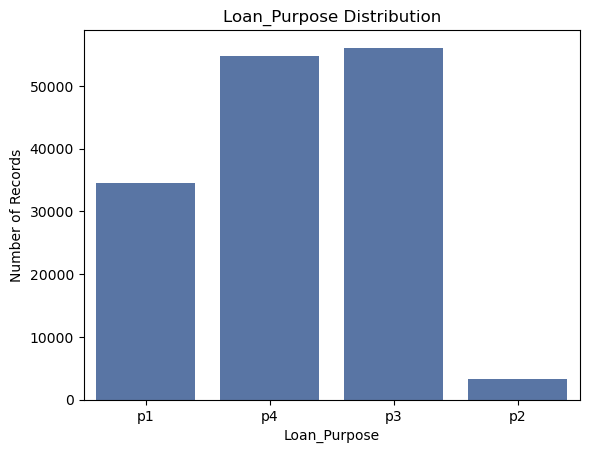

In [332]:
plot_countplot(df,'loan_purpose','Loan_Purpose')

## Business or Commercial Loan 

In [333]:
get_column_details(df,'business_or_commercial')


*****************************************
Details of business_or_commercial column
*****************************************

Datatype : object 

There are no null values present.

Number of Unique Values : 2

Distribution of Unique Values :
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64


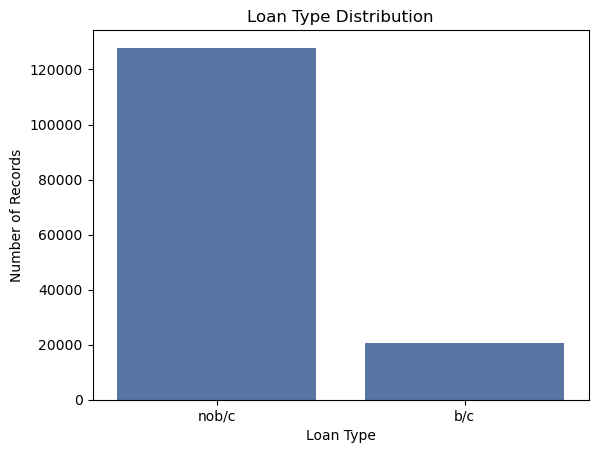

In [334]:
plot_countplot(df,'business_or_commercial','Loan Type')

## Loan Amount 

In [335]:
get_column_details(df,'loan_amount')


*****************************************
Details of loan_amount column
*****************************************

Datatype : int64 

There are no null values present.

Number of Unique Values : 211

Distribution of Unique Values :
loan_amount
206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: count, Length: 211, dtype: int64

Maximum Value : 3576500

Minimum Value : 16500



-------------------------------------------

Loan Amount Distribution Plot


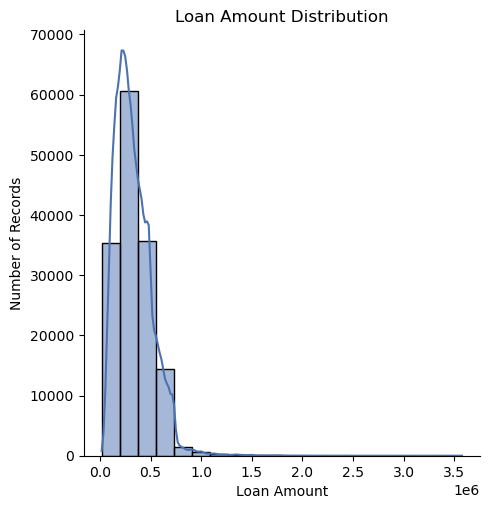

In [336]:
plot_displot(df,'loan_amount','Loan Amount')

## Rate of Interest 

In [337]:
get_column_details(df,'rate_of_interest')


*****************************************
Details of rate_of_interest column
*****************************************

Datatype : float64 


There are 36439 null values present.

Number of Unique Values : 131

Distribution of Unique Values :
rate_of_interest
3.990    14455
3.625     8800
3.875     8592
3.750     8474
3.500     6866
         ...  
4.700        1
8.000        1
7.750        1
5.300        1
2.700        1
Name: count, Length: 131, dtype: int64

Maximum Value : 8.0

Minimum Value : 0.0



-------------------------------------------

Interest Rate Distribution Plot


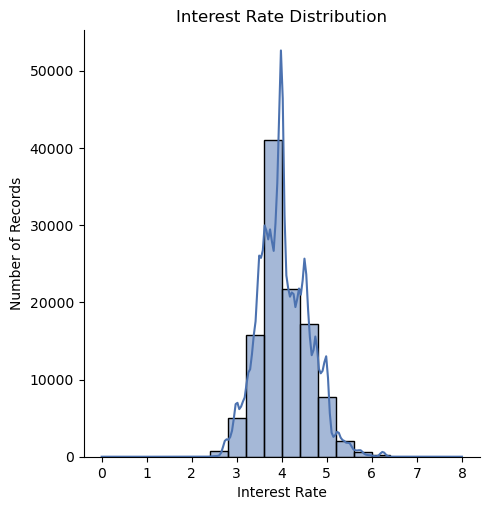

In [338]:
plot_displot(df,'rate_of_interest','Interest Rate')

## Upfront Charges 

In [339]:
get_column_details(df,'Upfront_charges')


*****************************************
Details of Upfront_charges column
*****************************************

Datatype : float64 


There are 39642 null values present.

Number of Unique Values : 58271

Distribution of Unique Values :
Upfront_charges
0.00       20770
1250.00     1184
1150.00      892
795.00       487
295.00       403
           ...  
4447.72        1
3173.84        1
3421.81        1
198.96         1
4323.33        1
Name: count, Length: 58271, dtype: int64

Maximum Value : 60000.0

Minimum Value : 0.0



-------------------------------------------

Upfront Payments Distribution Plot


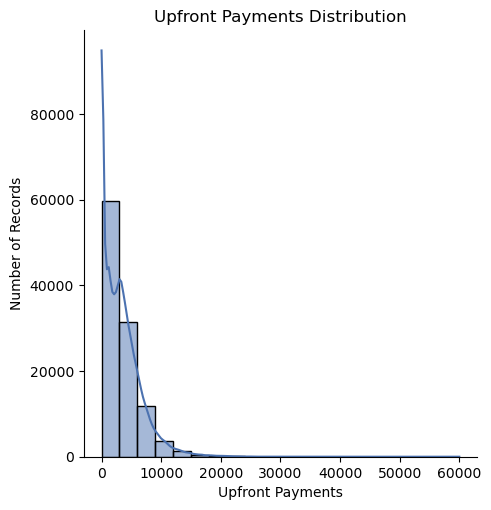

In [340]:
plot_displot(df,'Upfront_charges','Upfront Payments')

## Property Value 

In [341]:
get_column_details(df,'property_value')


*****************************************
Details of property_value column
*****************************************

Datatype : float64 


There are 15098 null values present.

Number of Unique Values : 385

Distribution of Unique Values :
property_value
308000.0     2792
258000.0     2763
358000.0     2679
408000.0     2537
328000.0     2524
             ... 
4648000.0       1
3878000.0       1
5758000.0       1
2618000.0       1
2698000.0       1
Name: count, Length: 385, dtype: int64

Maximum Value : 16508000.0

Minimum Value : 8000.0



-------------------------------------------

Property Value Distribution Plot


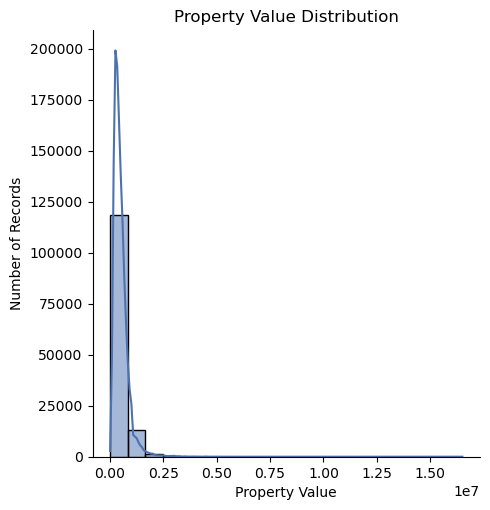

In [342]:
plot_displot(df,'property_value','Property Value')

## Occupancy Type 

In [343]:
get_column_details(df,'occupancy_type')


*****************************************
Details of occupancy_type column
*****************************************

Datatype : object 

There are no null values present.

Number of Unique Values : 3

Distribution of Unique Values :
occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64


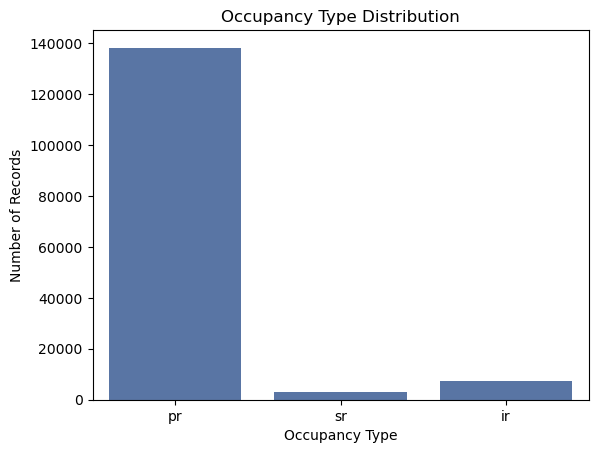

In [344]:
plot_countplot(df,'occupancy_type','Occupancy Type')

## Income 

In [345]:
get_column_details(df,'income')


*****************************************
Details of income column
*****************************************

Datatype : float64 


There are 9150 null values present.

Number of Unique Values : 1001

Distribution of Unique Values :
income
0.0         1260
3600.0      1250
4200.0      1243
4800.0      1191
3120.0      1168
            ... 
45300.0        1
154440.0       1
137760.0       1
145560.0       1
79920.0        1
Name: count, Length: 1001, dtype: int64

Maximum Value : 578580.0

Minimum Value : 0.0



-------------------------------------------

Income Distribution Plot


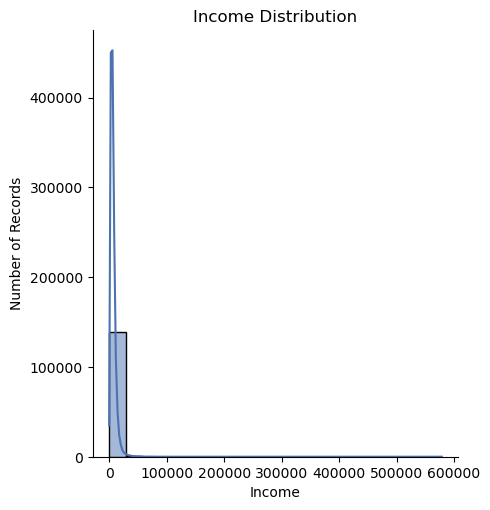

In [346]:
plot_displot(df,'income','Income')

## Credit Type 

In [347]:
get_column_details(df,'credit_type')


*****************************************
Details of credit_type column
*****************************************

Datatype : object 

There are no null values present.

Number of Unique Values : 4

Distribution of Unique Values :
credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64


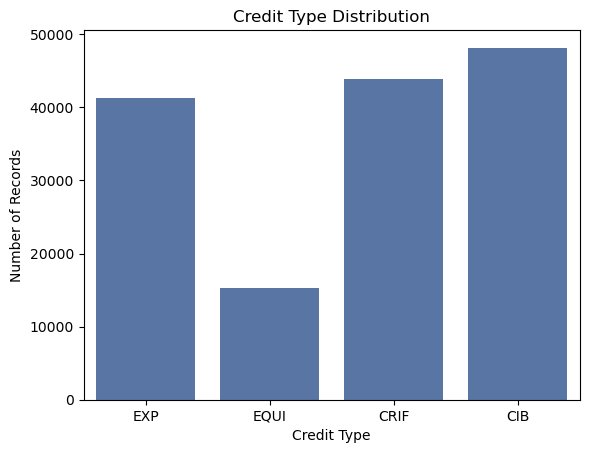

In [348]:
plot_countplot(df,'credit_type','Credit Type')

## Credit Score 

In [349]:
get_column_details(df,'Credit_Score')


*****************************************
Details of Credit_Score column
*****************************************

Datatype : int64 

There are no null values present.

Number of Unique Values : 401

Distribution of Unique Values :
Credit_Score
763    415
867    413
639    411
581    408
554    407
      ... 
745    330
573    330
743    327
748    324
559    321
Name: count, Length: 401, dtype: int64

Maximum Value : 900

Minimum Value : 500



-------------------------------------------

Credit Score Distribution Plot


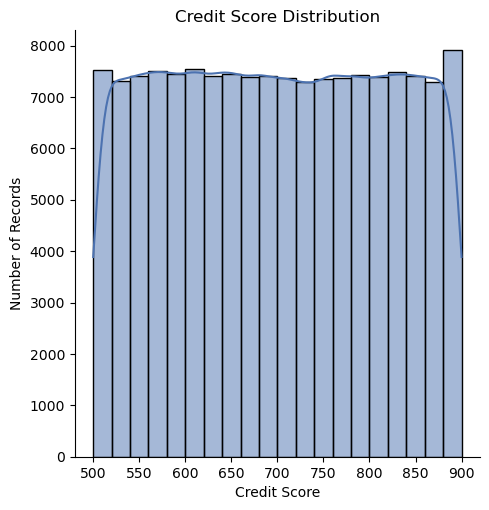

In [350]:
plot_displot(df,'Credit_Score','Credit Score')

## CoApplicant Credit Type

In [351]:
get_column_details(df,'co-applicant_credit_type')


*****************************************
Details of co-applicant_credit_type column
*****************************************

Datatype : object 

There are no null values present.

Number of Unique Values : 2

Distribution of Unique Values :
co-applicant_credit_type
CIB    74392
EXP    74278
Name: count, dtype: int64


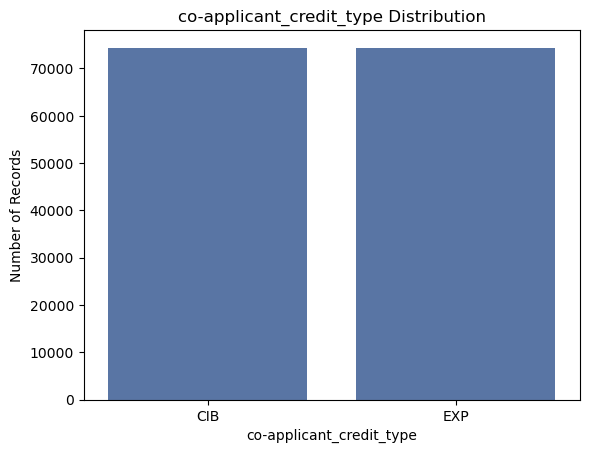

In [352]:
plot_countplot(df,'co-applicant_credit_type','co-applicant_credit_type')

## Age 

In [353]:
get_column_details(df,'age')


*****************************************
Details of age column
*****************************************

Datatype : object 


There are 200 null values present.

Number of Unique Values : 7

Distribution of Unique Values :
age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64


In [354]:
fill_na_with_mode(df,'age')


There are 200 null values present.
age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64

There are 0 null values present.
age
45-54    34920
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64



-------------------------------------------

Age Distribution Plot


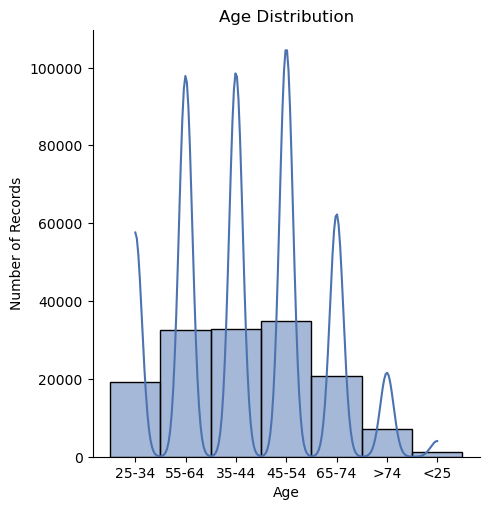

In [355]:
plot_displot(df,'age','Age')

## LTV

In [356]:
get_column_details(df,'LTV')


*****************************************
Details of LTV column
*****************************************

Datatype : float64 


There are 15098 null values present.

Number of Unique Values : 8484

Distribution of Unique Values :
LTV
81.250000    530
91.666667    499
80.038760    380
80.032468    328
94.956140    322
            ... 
33.598066      1
13.618746      1
55.981445      1
50.175070      1
32.802013      1
Name: count, Length: 8484, dtype: int64

Maximum Value : 7831.25

Minimum Value : 0.967478198



-------------------------------------------

Life Time Value Distribution Plot


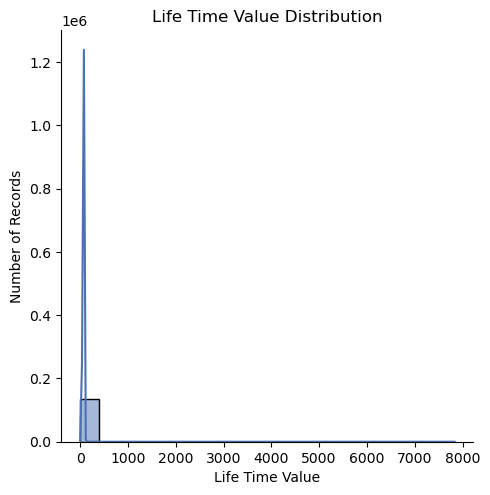

In [357]:
plot_displot(df,'LTV','Life Time Value')

## Region

In [358]:
get_column_details(df,'Region')


*****************************************
Details of Region column
*****************************************

Datatype : object 

There are no null values present.

Number of Unique Values : 4

Distribution of Unique Values :
Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64


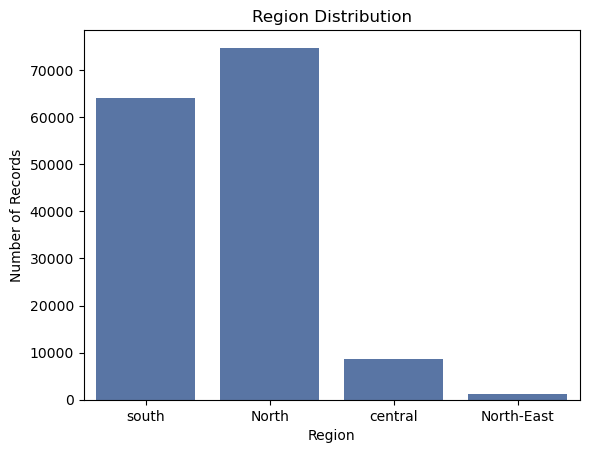

In [359]:
plot_countplot(df,'Region','Region')

## Status

In [360]:
get_column_details(df,'Status')


*****************************************
Details of Status column
*****************************************

Datatype : int64 

There are no null values present.

Number of Unique Values : 2

Distribution of Unique Values :
Status
0    112031
1     36639
Name: count, dtype: int64

Maximum Value : 1

Minimum Value : 0


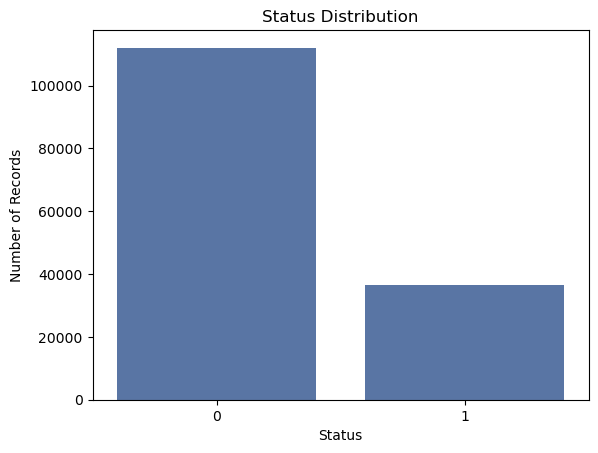

In [361]:
plot_countplot(df,'Status','Status')

## Outlier Treatment

### -> From the dataset, we can observe that the below columns have outliers. 
### -> Outliers has to be treated before filling null values in those columns.

### - loan_amount
### - Upfront_charges
### - property_value
### - income
### - LTV

## Helper Functions

### Numerical Column Utility Function

In [362]:
from scipy.stats import iqr

In [363]:
def get_column_stat(df,column):
    
    print('*************************')
    print(column)
    print('*************************')
    
   
    
    print(f'\nMinimum Value : {np.min(df[column])}')
    
    print(f'\nMaximum Value : {np.max(df[column])}')
    

    
    print(f'\nQ1 25th Percentile : {df[column].dropna().quantile(0.25)}')
        
    print(f'\nQ2 50th Percentile : {df[column].dropna().quantile(0.50)}')
    
    print(f'\nQ3 75th Percentile : {df[column].dropna().quantile(0.75)}')
    
    print(f'\nIQR Value : {iqr(df[column].dropna())}')
    

## Outlier Treatment Function

### Inter Quartile Range is used to identify outliers.

### Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR.

### IQR : Q3-Q1

In [364]:
def treat_outliers(df,column):
    
    
    print('\nBefore Treatment')
    
    print(f'\nMinimum Value : {np.min(df[column])}')
    
    print(f'\nMaximum Value : {np.max(df[column])}')
    
    q1 = df[column].dropna().quantile(0.25)
    
    q3 = df[column].dropna().quantile(0.50)
    
    iqr_value = iqr(df[column].dropna())
    
    low=q1-(1.5*iqr_value)
    
    high=q3+(1.5*iqr_value)
    
    df[column] = df[column].apply(lambda x : np.NaN if ((x < low) | (x > high)) else x)
    
    print('\nAfter Treatment')
    
    print(f'\nMinimum Value : {np.min(df[column])}')
    
    print(f'\nMaximum Value : {np.max(df[column])}')
    
    

### Numerical Column Null values can be filled with the column mean value after outlier treatment. 

## Fill Numerical Null Values with Mean 

In [365]:
def fill_na_with_mean(df,column):
    
    print(f'There are {df[column].isnull().sum()} null values.')
    
    
    df[column]=df[column].fillna(df[column].mean())
    
    
    df[column]=np.round(df[column],2)
    
    print(f'\nAfter imputing null values, there are {df[column].isnull().sum()} null values.')

### Loan Amount 

In [366]:
get_column_stat(df,'loan_amount')

*************************
loan_amount
*************************

Minimum Value : 16500

Maximum Value : 3576500

Q1 25th Percentile : 196500.0

Q2 50th Percentile : 296500.0

Q3 75th Percentile : 436500.0

IQR Value : 240000.0


In [367]:
treat_outliers(df,'loan_amount')


Before Treatment

Minimum Value : 16500

Maximum Value : 3576500

After Treatment

Minimum Value : 16500.0

Maximum Value : 656500.0


In [368]:
fill_na_with_mean(df,'loan_amount')

There are 7366 null values.

After imputing null values, there are 0 null values.



-------------------------------------------

Loan Amount Distribution Plot


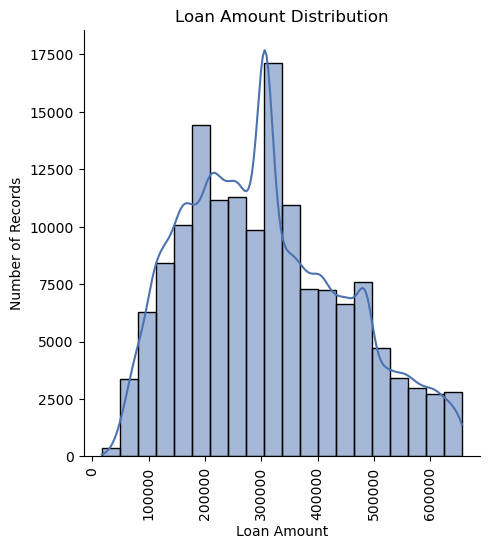

In [369]:
plot_displot(df,'loan_amount','Loan Amount',rotation=90)

### Upfront Charges 

In [370]:
get_column_stat(df,'Upfront_charges')

*************************
Upfront_charges
*************************

Minimum Value : 0.0

Maximum Value : 60000.0

Q1 25th Percentile : 581.49

Q2 50th Percentile : 2596.45

Q3 75th Percentile : 4812.5

IQR Value : 4231.01


In [371]:
treat_outliers(df,'Upfront_charges')


Before Treatment

Minimum Value : 0.0

Maximum Value : 60000.0

After Treatment

Minimum Value : 0.0

Maximum Value : 8941.25


In [372]:
fill_na_with_mean(df,'Upfront_charges')

There are 45748 null values.

After imputing null values, there are 0 null values.



-------------------------------------------

Upfront Charges Distribution Plot


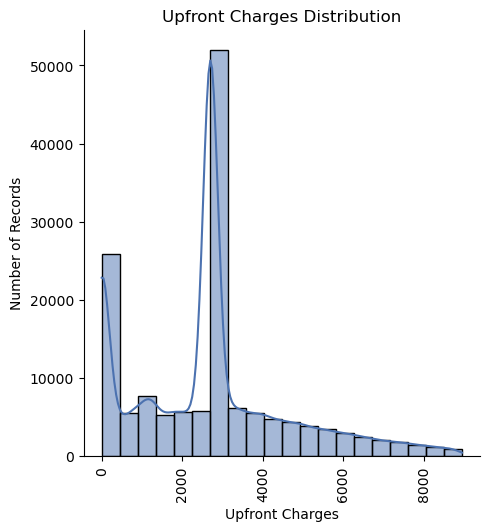

In [373]:
plot_displot(df,'Upfront_charges','Upfront Charges',rotation=90)

### Property Value 

In [374]:
get_column_stat(df,'property_value')

*************************
property_value
*************************

Minimum Value : 8000.0

Maximum Value : 16508000.0

Q1 25th Percentile : 268000.0

Q2 50th Percentile : 418000.0

Q3 75th Percentile : 628000.0

IQR Value : 360000.0


In [375]:
treat_outliers(df,'property_value')


Before Treatment

Minimum Value : 8000.0

Maximum Value : 16508000.0

After Treatment

Minimum Value : 8000.0

Maximum Value : 958000.0


In [376]:
fill_na_with_mean(df,'property_value')

There are 24387 null values.

After imputing null values, there are 0 null values.



-------------------------------------------

Property Value Distribution Plot


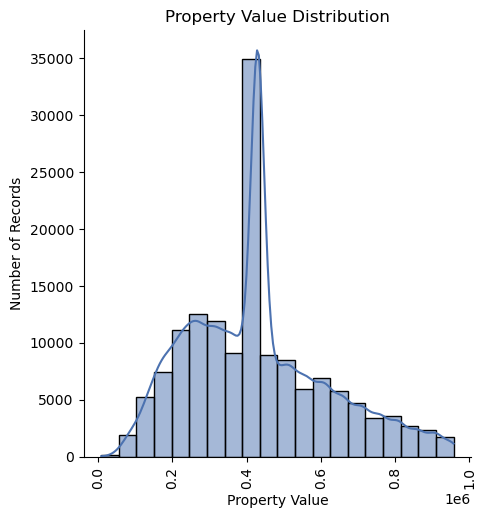

In [377]:
plot_displot(df,'property_value','Property Value',rotation=90)

### Income 

In [378]:
get_column_stat(df,'income')

*************************
income
*************************

Minimum Value : 0.0

Maximum Value : 578580.0

Q1 25th Percentile : 3720.0

Q2 50th Percentile : 5760.0

Q3 75th Percentile : 8520.0

IQR Value : 4800.0


In [379]:
treat_outliers(df,'income')


Before Treatment

Minimum Value : 0.0

Maximum Value : 578580.0

After Treatment

Minimum Value : 0.0

Maximum Value : 12960.0


In [380]:
fill_na_with_mean(df,'income')

There are 20750 null values.

After imputing null values, there are 0 null values.



-------------------------------------------

Income Distribution Plot


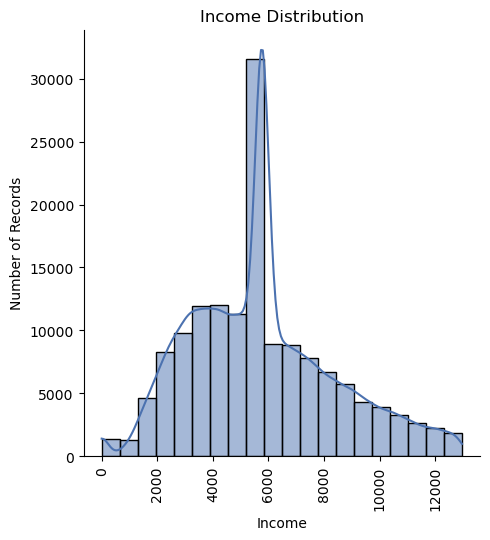

In [381]:
plot_displot(df,'income','Income',rotation=90)

### LTV 

In [382]:
get_column_stat(df,'LTV')

*************************
LTV
*************************

Minimum Value : 0.967478198

Maximum Value : 7831.25

Q1 25th Percentile : 60.47486034

Q2 50th Percentile : 75.13586957

Q3 75th Percentile : 86.18421053

IQR Value : 25.709350190000002


In [383]:
treat_outliers(df,'LTV')


Before Treatment

Minimum Value : 0.967478198

Maximum Value : 7831.25

After Treatment

Minimum Value : 21.91295547

Maximum Value : 113.6682243


In [384]:
fill_na_with_mean(df,'LTV')

There are 17156 null values.

After imputing null values, there are 0 null values.



-------------------------------------------

LTV Distribution Plot


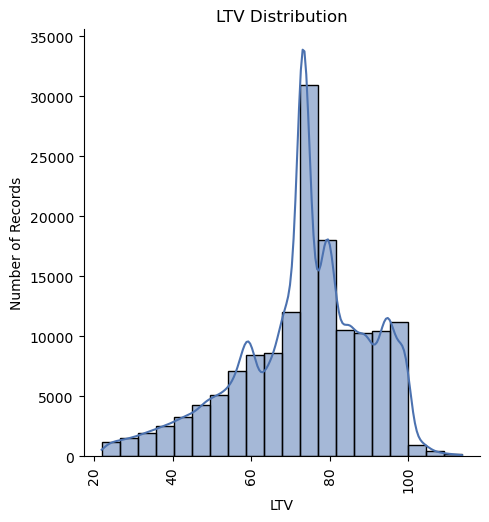

In [385]:
plot_displot(df,'LTV','LTV',rotation=90)

### Rate Of Interest 

In [386]:
fill_na_with_mean(df,'rate_of_interest')

There are 36439 null values.

After imputing null values, there are 0 null values.


In [387]:
df.isna().sum()/len(df)

ID                          0.0
year                        0.0
loan_limit                  0.0
Gender                      0.0
loan_type                   0.0
loan_purpose                0.0
business_or_commercial      0.0
loan_amount                 0.0
rate_of_interest            0.0
Upfront_charges             0.0
property_value              0.0
occupancy_type              0.0
income                      0.0
credit_type                 0.0
Credit_Score                0.0
co-applicant_credit_type    0.0
age                         0.0
LTV                         0.0
Region                      0.0
Status                      0.0
dtype: float64

In [388]:
df.drop(['ID','year'],axis=1,inplace=True)

## Label Encoding 

### Helper Functions 

In [389]:
def encode(df,column,current_value,replace_value):
    
    df[column]=df[column].replace(current_value,replace_value)

In [390]:
def upper(df,column):
    
    df[column]=df[column].str.upper()

## Loan Limit  

In [391]:
encode(df,'loan_limit','cf','FIXED')
encode(df,'loan_limit','ncf','VARIABLE')

In [392]:
df.loan_limit.value_counts()

loan_limit
FIXED       138692
VARIABLE      9978
Name: count, dtype: int64

## Loan Type  & Loan Purpose

In [393]:
encode(df,'business_or_commercial','b/c','BUSINESS/COMMERCIAL')
encode(df,'business_or_commercial','nob/c','PERSONAL')

In [394]:
df.business_or_commercial.value_counts()

business_or_commercial
PERSONAL               127908
BUSINESS/COMMERCIAL     20762
Name: count, dtype: int64

In [395]:
upper(df,'loan_purpose')

In [396]:
df.loan_purpose.value_counts()

loan_purpose
P3    56068
P4    54799
P1    34529
P2     3274
Name: count, dtype: int64

In [397]:
upper(df,'loan_type')

In [398]:
df.loan_type.value_counts()

loan_type
TYPE1    113173
TYPE2     20762
TYPE3     14735
Name: count, dtype: int64

### Type of Occupancy  

In [399]:
encode(df,'occupancy_type','pr','PRIMARY RESIDENT')
encode(df,'occupancy_type','sr','SECONDARY RESIDENT')
encode(df,'occupancy_type','ir','INVESTMENT RESIDENT')

In [400]:
df.occupancy_type.value_counts()

occupancy_type
PRIMARY RESIDENT       138201
INVESTMENT RESIDENT      7340
SECONDARY RESIDENT       3129
Name: count, dtype: int64

### Region 

In [401]:
upper(df,'Region')

In [402]:
df.Region.value_counts()

Region
NORTH         74722
SOUTH         64016
CENTRAL        8697
NORTH-EAST     1235
Name: count, dtype: int64

### Credit Score 

In [403]:
df['Credit_Score']=pd.cut(df.Credit_Score,bins=[499,580,670,760,840,901],labels=['POOR','FAIR','GOOD','VERY GOOD','EXCELLENT'])

In [404]:
df['Credit_Score'].value_counts()

Credit_Score
FAIR         33520
GOOD         33134
POOR         30124
VERY GOOD    29641
EXCELLENT    22251
Name: count, dtype: int64

### Status

In [405]:
df['Status_Category']=df['Status'].astype('str').replace('0','DEFAULTER').replace('1','COMPLAINT')

In [406]:
df['Status_Category'].value_counts()

Status_Category
DEFAULTER    112031
COMPLAINT     36639
Name: count, dtype: int64

In [407]:
df['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

## Exporting Cleaned data 

In [408]:
df.to_csv('../Data/clean_data.csv',index=False)